# ⭐AIFFEL 대전 1기 Exploration 17. Movie_Prediction⭐
>  프로젝트 소개: 영화 시청 데이터를 기반으로 시청할 영화 예측하기

***

# 🎯 프로젝트 목표
   * 세션과 GRU모델에 대한 이해  
   * precision@k, recall@k, MAP, MRR, NDCG 지표에 대한 이해  
   * 데이터를 이해하고 분리해서 학습, 예측하기

***

# ✅프로젝트 순서
## 0. 개념 정리
## 1. 데이터 불러오기 & 살펴보기
## 2. 데이터 전처리
## 3. 미니 배치의 구성
## 4. 모델 구성
## 5. 모델 학습
## 6. 모델 리스트
## 7. 하이퍼 파라미터 변경에 따른 지표 변화
## 8. 회고
- 8-1. 루브릭 평가  
- 8-2. 회고

***

# 0. 개념정리
## &#160;&#160;1. Session-Based Recommendation
- 세션 데이터를 기반으로 **유저가 다음 클릭 또는 구매할 아이템을 예측하는 추천**  
- Session: 유저가 서비스를 이용하면서 발생하는 중요한 정보를 담는 데이터를 말하며, 서버쪽에 저장됨. (**브라우저가 종료되기 전까지 유저의 행동을 담는 시퀀스 데이터** 처럼 사용)  
- 또한 유저의 행동 데이터들은 쿠키 형태로 저장되는데, 쿠키는 세션과 상호작용하면서 정보를 주고 받는다.  

## &#160;&#160;2. E-commerce 데이터 특징
- 비로그인 상태로 탐색하는 유저가 많습니다.  
- 로그인 상태로 탐색한다고 할지라도 접속할 때 마다 탐색하는 의도가 뚜렷하게 다릅니다.  

## &#160;&#160;3. GRU4REC
- 2016년에 ICLR에 공개된   
[SESSION-BASED RECOMMENDATIONS WITH RECURRENT NEURAL NETWORKS](https://arxiv.org/pdf/1511.06939v4.pdf)  
- Session Data에서는 처음으로 RNN 계열 모델을 적용해 발표.  
모델 구조는 아래 그림처럼 간단합니다.

여러 RNN 계열의 모델(e.g. LSTM)이 있겠지만 저자가 실험해본 결과 **GRU의 성능이 제일 좋았다**고 합니다.
또한 **Embedding Layer를 사용하지 않았을 때**가 사용했을 때보다 **성능이 좋았다**고 합니다.
이번 자료에서도 Embedding Layer를 사용하지 않고 One-hot Encoding만 사용하겠습니다.  

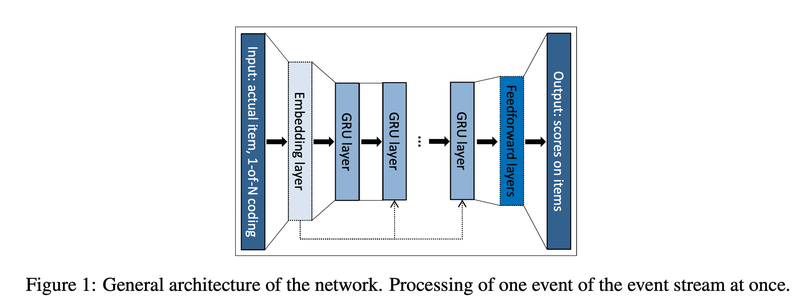

## &#160;&#160;4. Sesson-Parallel Mini-Batches
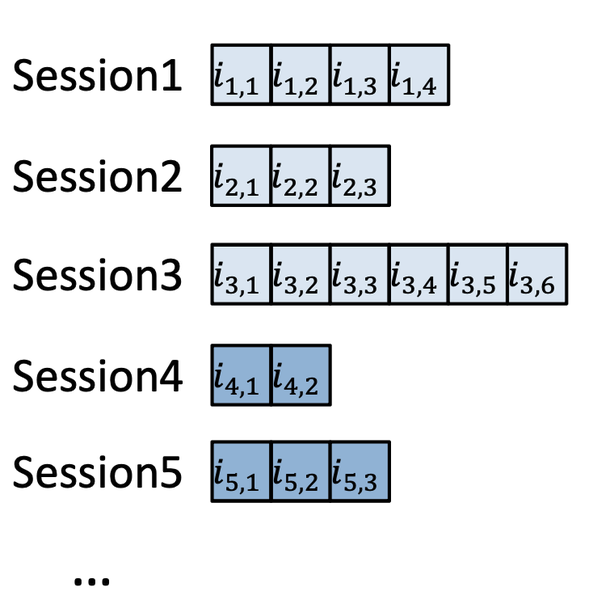  
- 우려사항: 위 그림에서 Session 1,2,3을 하나의 미니배치로 만든다면, Session3의 연산이 끝나야 이 미니배치 연산이 끝난다.  
#### Session이 끝날 때까지 기다리지 않고 병렬적으로 계산.  
- 아래 그림처럼 Seesion2가 끝나면 Session4가 시작하는 방식.  
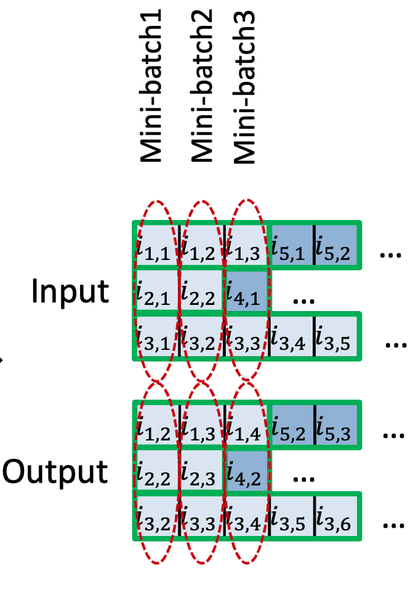  

### SAMPLING ON THE OUTPUT
- Negative Sampling와 같은 개념  
- Item의 수가 많기 때문에 **Loss를 계산할 때** 모든 아이템을 비교하지 않고 **인기도를 고려하여 Sampling**  

### Ranking Loss
- Session-Based Recommendation Task를 여러 아이템 중 다음 아이템이 무엇인지 Classification하는 Task  
- 여러 아이템을 관련도 순으로 랭킹을 매겨서 높은 랭킹의 아이템을 추천하는 Task로도 생각할 수 있다.  

자세한 내용은 [논문](https://arxiv.org/pdf/1511.06939v4.pdf)

## &#160;&#160;5. precison@k, recall@k 
- precision(정밀도)  
- recall(재현율)  

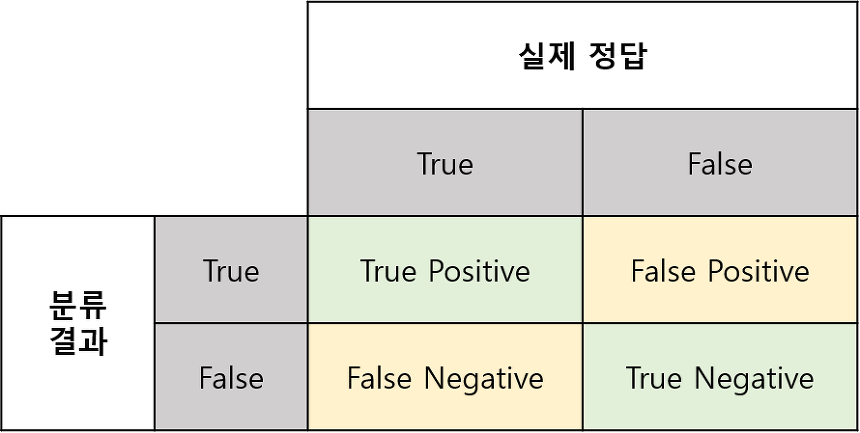
  
  
### precision
- 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율  
- 정답률이라고 부르기도 한다. 날씨 예측 모델이 `맑음`으로 예측했는데, 실제 날씨가 맑았는지 살펴보는 지표.  
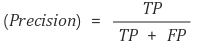

### recall
- 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율  
- 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표  
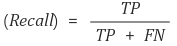

### precision, recall 비교
1. precision과 recall은 모두 실제 True인 정답을 모델이 True라고 예측한 경우에 관심이 있으나, 바라보고자 하는 관점만 다르다.  
2. precision은 모델의 입장, recall은 실제 정답의 입장에서 **정답을 정답이라고 맞춘 경우**를 바라보고 있다.  
3. 다음 경우를 생각해보자. '확실히 맑은 날을 예측할 수 있다면 해당 날에만 맑은 날이라고 예측하자' 라고 한다면, **FP(=실제는 맑지 않은데 맑다고 예측하는 경우)**를 줄여 precision을 끌어올릴 수 있다. 30일 중 실제 맑은 날이 20일이라고 한다면 모델이 2일은 확실히 맑다 라고 예측한다면 FP가 0이므로 precision은 100%가 된다.  
4. 실제로 맑은 20일 중 맑지 않다고 예측(FN)을 고려해(recall) 모델을 평가해야 한다.  
5. 즉, 모델을 평가할 때 데이터의 성격에 따라 precision, recall에 좀 더 비중을 둬야겠지만 두 지표 모두 고려하는 것이 올바르다.  

### @k 는 무슨 의미?
- 추천 시스템에서 모델이 출력하는 추천의 개수에 따라 precision, recall을 측정한다.  
- k값에 따라 두 지표의 크기가 달라진다.  
1. precision@k: k개 추천 중 실제로 사용자가 선호하는 아이템이 얼마나 존재하는 지를 측정하는 지표  
2. recall@k: 전체 선호 아이템 중 추천된 아이템이 속한 비율  

### 예시를 통해 이해해보자
내가 선호하는 영화 = 나이트메어, 13일의 금요일, 오멘, 엑소시스트, 컨저링, 인시디어스, 주온, 링, 장화홍련, 기담  
A 추천 모델의 추천 영화@4 = 나이트메어, 13일의 금요일, 러브 액츄얼리, 어바웃 타임  
B 추천 모델의 추천 영화@4 = 나이트메어, 맘마미아, 원스, 라라랜드  
A 추천 모델의 추천 영화@5 = 나이트메어, 13일의 금요일, 러브 액츄얼리, 어바웃 타임, 오멘  

**여기서 잠깐!**  

**Precision** = TP(True Positive) / TP + **FP(False Positive)**  
**recall** = TP(True Positive) / TP + **FN(False Negative)**  

FP = 내가 싫어하는 영화인데 모델은 자꾸 좋아할거라고 추천하는 모양새, 높을수록 Precision이 떨어진다.  
FN = 내가 좋아하는 영화인데 모들은 자꾸 싫어할거라고 추천 안하는 모양새, 높을수록 recall이 떨어진다.  

precision@k는 추천받은 k개 영화 중 내가 선호하는 영화의 비율을 나타낸다. 즉, '사용자에 얼마나 유용한 항목을 추천했는지'를 판단할 수 있다. 여기서는 precision@4 = 2/4(추천 영화 중 내가 선호하는 영화 / k)이다. precision@k가 높을수록 k개의 추천 목록 중 내가 실제로 선호하는 항목이 많다는 의미이다.  

recall@k는 추천받은 k개 영화 중 내가 선호하는 영화의 개수와 내가 선호하는 영화 전체의 비율을 나타낸다. 다르게 말하면 추천모델은 k번의 추천할 수 있는 기회를 가지고 있고 k번의 기회 중 몇 번이나 내가 선호하는 영화를 맞출 수 있는지를 알 수 있다. 위의 예에서는 4번의 기회를 가지고 있고 2번 맞췄다. recall@4 = 2/10(선호 영화를 맞춘 횟수 / 전체 선호 영화)를 구할 수 있다. 높을수록 내가 실제로 선호하는 영화를 잘 추천한다고 볼 수 있다.  

|모델비교|Precision@4|recall@4|Precision@5|recall@5|
|:------:|-----|---|-----|---|
|A|2/4=0.5|2/10=0.2|3/5=0.6|3/10=0.3|
|B|1/4=0.25|1/10=0.1|
|차이|0.25|0.1|

|모델|Precision@4|Precision@5|차이|recall@4|recall@5|차이|
|------|-----|-----|---|---|---|---|
|A|0.5|0.6|0.1|0.2|0.3|0.1|

결론1. Precision@k는 항상 recall@k보다 크다.  
결론2. Precision@k가 k변화에 대해 더 민감하다.  
결론3. Precision@k의 경우 작은 k값으로도 성능을 측정할 수 있을 것(이유: k변화에 민감하게 반응해 크기가 바뀌기 때문에 k가 커질수록 지표값이 크게 증폭되지 않을 것)  
결론4. recall@k의 경우 k값을 키워(추천할 수 있는 기회를 많이 준다는 의미) 지표값이 증폭되는 k값을 선택해 비교해야 할 것  

최종결론. 영화 추천의 경우 Precision@k를 이용해 내가 싫어하는 영화를 자꾸 추천해주는 모델의 성능을 평가하는 것이 옳다. recall@k의 경우 '뭐 내가 좋아하는 영화 추천 안해줄 수 있지. 대신 다음엔 더 좋은 추천을 해주겠지'라고 생각할 수 있다. 하지만 recall도 함께 고려해 평가하는 것이 올바르다고 할 수 있다.  
참고) 암 진단의 경우 FN = 실제는 암인데 암이 아니라고 진단하는 경우 이기 때문에 recall이 더 중요한 지표이다.  

precison@k, recall@k 계산법  
위의 계산법은 유저 1명에 해당하는 계산이었다. precison@k, recall@k를 계산하려면 전체 유저의 평균을 구해야 한다.  
예시는 아래와 같다.  
유저A의 precision@4 = 0.5, 유저B의 precision@4 = 0.3이라면 전체 precision@4 = (0.5 + 0.3) / 2 = 0.4  
유저A의 recall@4 = 0.2, 유저B의 recall@4 = 0.4이라면 전체 recall@4 = (0.2 + 0.4) / 2 = 0.3

## &#160;&#160;6. MRR
- 추천 시스템의 관련 컨텐츠가 얼마나 상위에 노출되는지를 알 수 있는 평가지표 중 하나  
- Mean Reciprocal Rank  
- 우선순위를 고려한 평가기준 중 가장 간단한 모델  
1. 각 사용자마다 제공한 추천 컨텐츠 중 관련있는 컨텐츠 중 가장 높은 위치를 역수로 게산(1/k)  
2. 사용자마다 계산된 점수를 모아 평균을 계산  

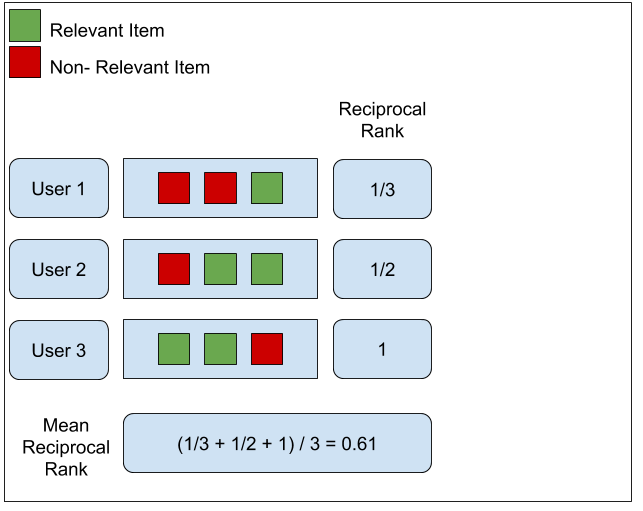
위 그림을 보면 3명의 사용자에게 각각 다른 추천 컨텐츠를 제공함.  
(녹색은 관련있음, 적색은 관련없음)  
1. User1은 가장 관련 있는 컨텐츠(가장 상위 관련 컨텐츠)가 3번째: reciprocal rank가 1/3  
2. User2의 reciprocal rank: 1/2 (가장 상위 관련 컨텐츠가 2번째)  
3. User3의 reciprocal rank: 1/1 (가장 상위 관련 컨텐츠가 1번째)  
**이렇게 구해진 모든 사용자의 reciprocal rank의 평균을 계산하면 MRR**  
**<U>위 그림의 MRR: (1/3 + 1/2 + 1/1) / 3 = 0.61</U>**  

### MRR의 장점
1. **간단하고 쉽다.**  
2. 제공된 목록 중 가장 상위의 관련된 컨텐츠에만 집중하기 때문에, **사용자게 가장 관련있는 컨텐츠가 최상위에 있는가를 평가할 때 용이.**  
3. 새로운 컨텐츠가 아니라 **이미 사용자가 알고 있는 컨텐츠 중 가장 선호할만한 컨텐츠를 보여주고 할 때 좋은 평가 기준**이 된다.  

### MRR의 단점
1. 제공된 목록 중 하나의 컨텐츠에만 집중하기 때문에 **나머지 부분에 대해서는 평가하지 않는다.**  
2. 관련 컨텐츠의 개수가 달라도 **첫 번째 관련 컨텐츠의 위치가 같은 경우 같은 점수를 가지므로 변별력을 가지기 어렵다.**  
3. 사용자가 컨텐츠에 대해 잘 알지 못해 여러 번 탐색을 해야하는 경우 살펴봐야 하는 컨텐츠의 개수가 1개 이상일 가능성이 높으므로 좋은 평가 기준이 되기 어렵다.

## &#160;&#160;7. MAP
### Precision@k
- 상위 k개까지의 정밀도를 구하는 방법(MRR의 단점인 최상위 컨텐츠만 고려하는 문제 해결)  
- 하지만 관련 컨텐츠의 순위(rank)를 점수에 반영할 수 없는 단점 --> 이를 개선하고자 등장한 MAP(Mean Average Precision)  

1. 각 사용자마다 관련된 컨텐츠를 구하여 해당 관련 컨텐츠 위치까지의 목록(sublist)에 대하여 정밀도를 계산.  
2. 계산된 정밀도 값들에 대하여 사용자별로 평균을 내고, 그 결과를 모두 모아 평균을 계산.  

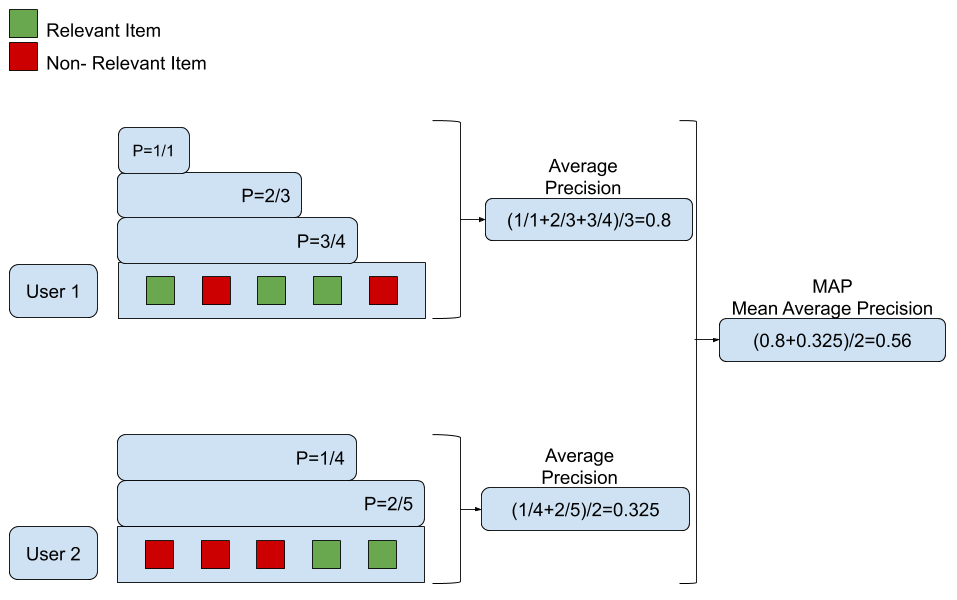

위 그림을 보면 사용자 2명에게 각각 5개의 추천 컨텐츠를 평가 대상으로 삼는다.  
1. User1: 1,3,4번째 컨텐츠가 관련됨.  
- 평균 정밀도 계산: 첫 번째 관련 컨텐츠까지 정밀도가 1/1이고, 다음 관련 컨텐츠까지의 정밀도는 2/3(총 3개중 2개가 관련된 컨텐츠), 네 번째 컨텐츠는의 정밀도는 3/4이다. 즉, User1의 평균 정밀도는 (1/1 + 2/3 + 3/4)/3 = 0.8  
2. User2: 4,5,번째 컨텐츠가 관련됨.  
- 평균 정밀도 계산: (1/4 + 2/5) / 2 = 0.325  

**이렇게 구해진 각 사용자의 평균 정밀도에 대하여 평균 계산: (0.8 + 0.352)/2 = 0.56**  
<U>**위에서 구한 0.56이 MAP 점수가 된다.**</U>  

### MAP의 장점
1. 추천 컨텐츠의 단순한 성능을 평가하는 것이 아니라 **우선순위를 고려한 성능을 평가할 수 있다.**    
2. 상위에 있는 오류(관련없는 컨텐츠)에 대해서는 가중치를 더 주고, 하위에 있는 오류에 대해서는 가중치를 적게 주어 **관련 컨텐츠가 상위에 오를 수 있도록 도움을 준다.**  

### MAP의 단점
1. MAP는 **관련 여부가 명확하지 않은 경우에는 계산하기 어렵다.**  
2. 1\~5점으로 평가하는 평점같이 관련 여부를 판단하기 어려운 경우는 MAP를 사용하기 어렵다.(4~5점은 관련있다고 판단하더라도 3점은 관련 여부를 판단하기 어려울 것이다.)  

### MAP 특징 정리
1. MRR과 다르게 상위 k개의 추천 컨텐츠에 대하여 평가 가능.  
2. precision@k과는 다르게 추천 컨텐츠의 우선순위를 고려해 점수 계산 가능  
3. 만약 컨텐츠의 관련 여부를 이분법으로 나눌 수 있다면 MAP는 좋은 평가 모델이 된다.  

## &#160;&#160;8. NDCG
- Normalized Discounted Cumulative Gain  
- MAP와 비슷하지만 NDCG는 관련 여부에 대해 이분법적으로 구분하는 것이 아니라 **더 관련있는 컨텐츠는 무엇인가?**에 대해 집중하여 더 관련있는 컨텐츠를 더욱더 상위에 노출시키는지에 대해 평가  

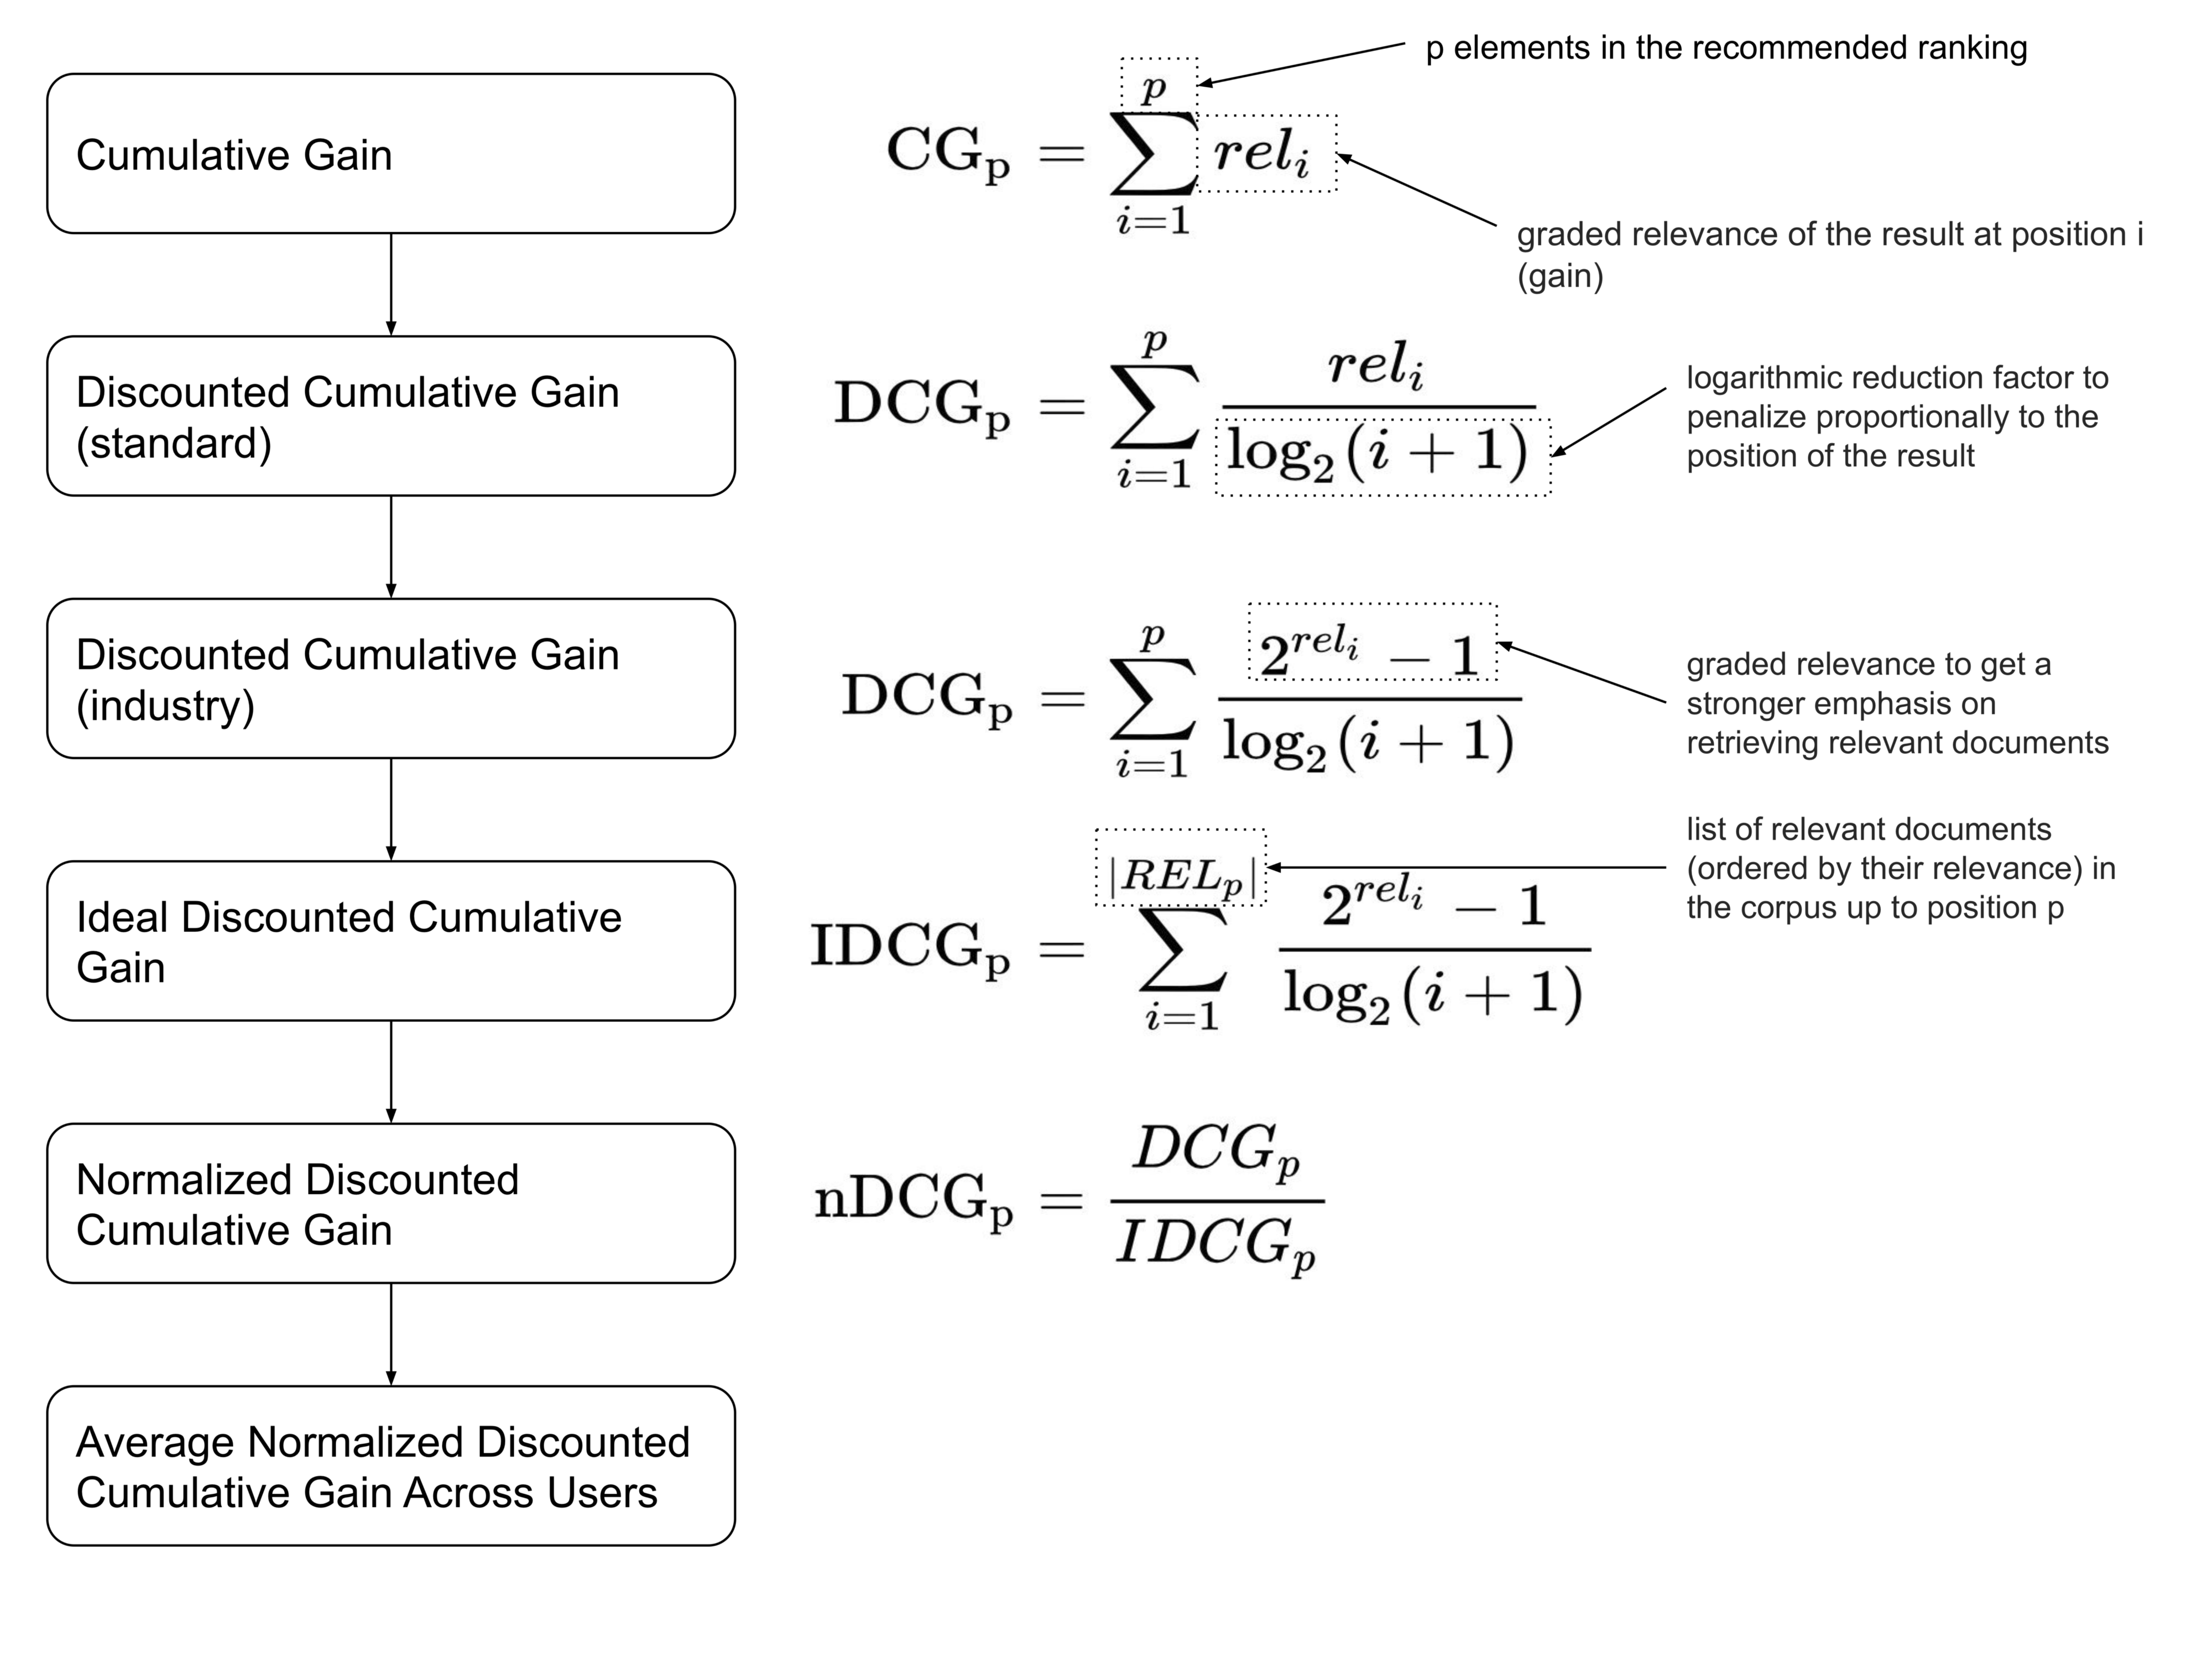
1. 모든 추천 컨텐츠들의 관련도를 합하여 CG(cumulative gain)을 구한다.  
2. CG에서 추천 컨텐츠들의 관련도를 합하였다면, DCG는 각 추천 컨텐츠의 관련도를 log함수로 나누어 값을 구한다. log함수 특성상 위치 값이 클수록(하위에 있을 수록) DCG의 값을 더 작아지게 함으로써 상위 컨텐츠의 값을 점수에 더 반영할 수 있게 한다.  
3. DCG 값에 관련도를 더 강조하고 싶다면, 2^관련도 - 1과 같이 관련도의 영향을 증가시킬 수 있다.  
4. 사용자마다 제공되는 추천 컨텐츠의 DCG와는 별개로 IDCG(이상적인 DCG)를 미리 계산해놓는다.  
5. 각 사용자의 DCG를 IDCG로 나누어서 사용자별 NDCG를 구한다.  
6. 사용자별 NDCG의 평균을 구하여 해당 IR의 NDCG를 구한다.  

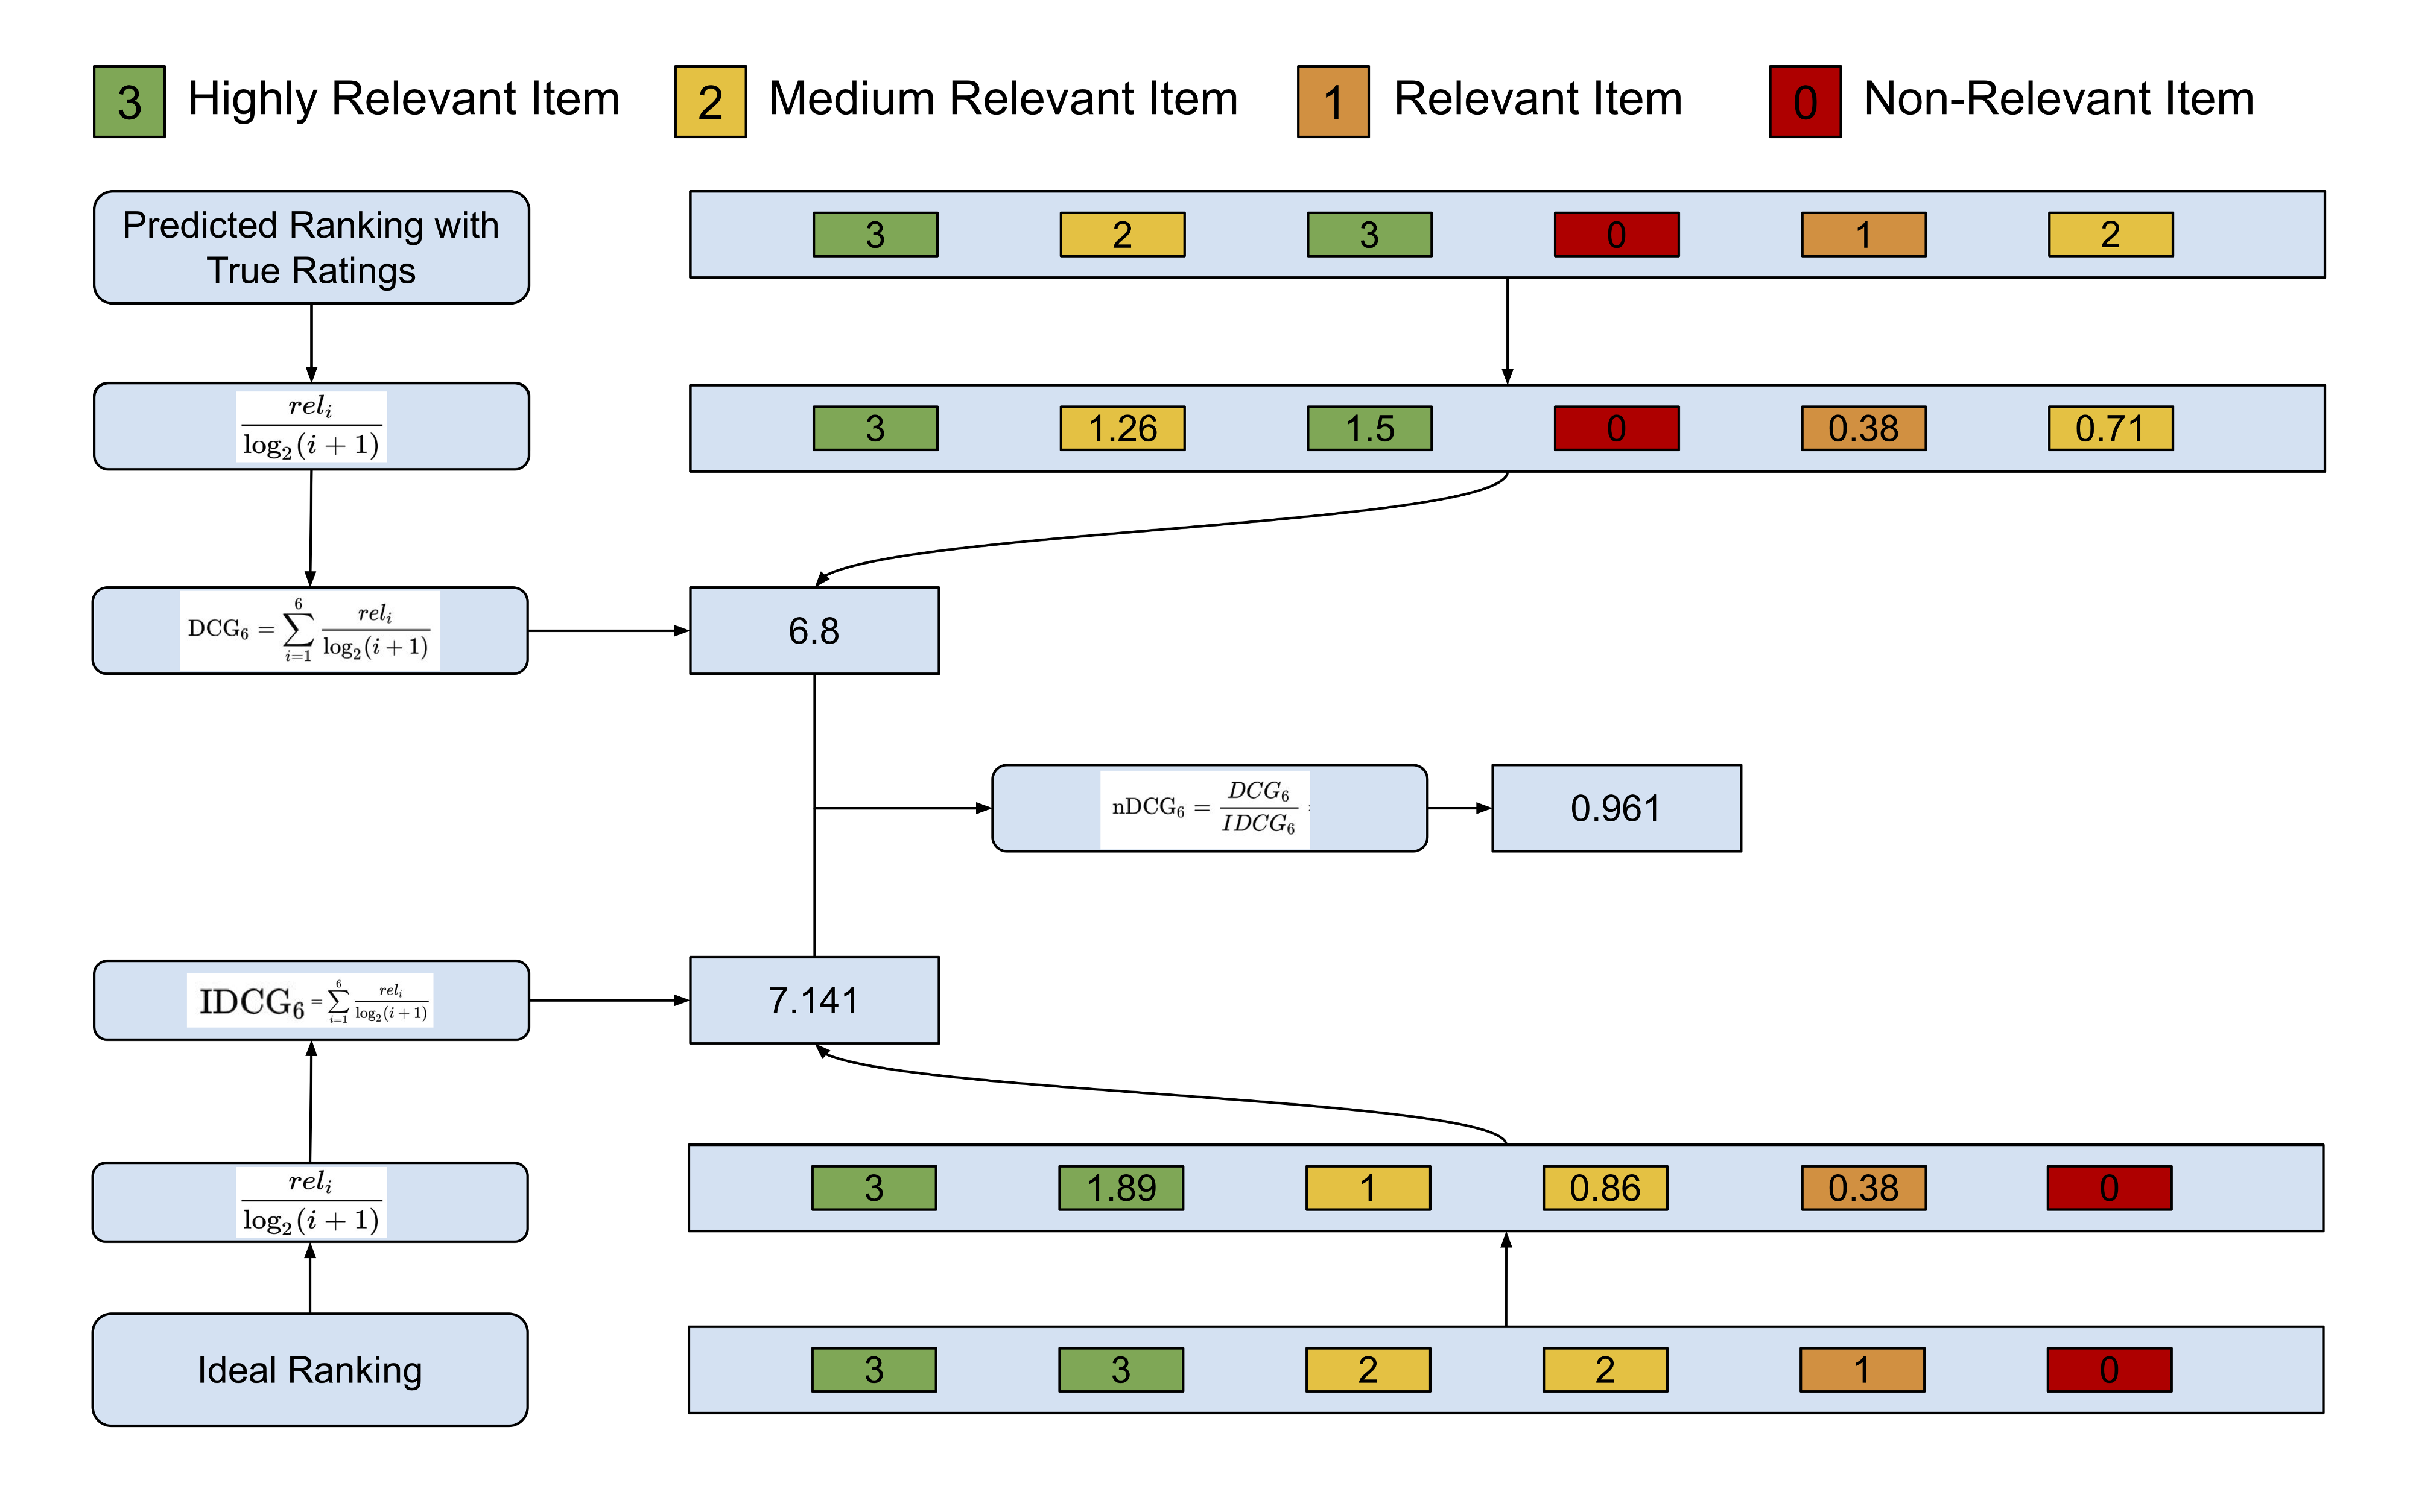
위 그림은 컨텐츠의 관련도를 이분법적으로 나누지 않고 0~3까지의 평점으로 관련도를 등급화  
먼저 NDCG = DCG/IDCG로 구할 수 있다.  
- **IDCG구하는 방법**  
1. 총 6개의 추천 컨텐츠 중 1,2번째 컨텐츠는 3점을 받을 것으로 기대, 3,4번째 컨텐츠는 2점, 5번째는 1점, 6번째는 0점을 받을 것으로 기대됨.  
<script type="text/javascript"  src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>
2. 계산방법  
3(첫 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (1+1)\\) +   
3(두 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (2+1)\\) +   
2(세 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (3+1)\\) +   
2(네 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (4+1)\\) +   
1(다섯 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (5+1)\\) +   
0(여섯 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (6+1)\\)  
\= **7.141 (IDCG)**  

- **DCG구하는 방법**  
1. 사용자의 추천 컨텐츠가 3,2,3,0,1,2만큼 관련이 있다면 (최상단)  
2. 계산방법  
3(첫 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (1+1)\\) +   
2(두 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (2+1)\\) +   
3(세 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (3+1)\\) +   
0(네 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (4+1)\\) +   
1(다섯 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (5+1)\\) +   
2(여섯 번째 컨텐츠에 대한 기대하는 점수) / \\(log_2 (6+1)\\)  
\= **6.8 (DCG)**  

### NDCG 계산
- NDCG = DCG/IDCG 식 활용  

**NDCG = DCG / IDCG = 6.8 / 7.141 = 0.961**  

위에서 구한 NDCG는 사용자 **한 명**에 대한 결과이므로 전체를 구하고자 한다면, <U>각 사용자별 NDCG를 구해 평균을 구하면 된다.</U>  

### NDCG 장점
1. 기존 방법과는 다르게 다양한 관련도에 대한 평가가 가능하다.  
2. 이분법적인 관련도에도 뛰어난 성능을 보인다.  
3. log 함수를 이용하여 하위 컨텐츠에 대한 영향을 줄임으로써 좋은 성능을 보인다.  

### NDCG 단점
1. 사용자와의 관련성을 파악하기 어려운 상황에는 문제의 소지가 있다. 사용자가 컨텐츠에 대한 평가를 하지 않는다면(평점을 입력하지 않는 경우) 해당 관련도를 어떻게 처리해야 할지에 대해 정의해야 한다. 0점 처리해도 문제가 될 것이고, 평균 값을 이용해도 문제가 될 수 있다.  
2. 사용자의 관련 컨텐츠가 없다고 판단될 경우, 임의로 NDCG를 0으로 설정해주어야 한다.  
3. 보통 K개의 NDCG를 가지고 IR을 평가하는데 IR에서 제공한 컨텐츠가 K보다 부족한 경우, 부족한 관련도를 최소 점수로 채워서 계산해야 한다.  

### NDCG 특징
- 특별한 경우가 아니라면 훌륭한 평가 기준이 될 수 있다.  
- 특별한 경우라면 예외처리를 해줘야 하고 관련도에 대한 기준을 상황마다 명확하게 세워야 한다.  
- **이런 것들을 감안하더라도 평점 기반의 추천 서비스에서 NDCG를 활용하면 좋은 평가를 할 수 있을 것**  

***

# 1. 데이터 불러오기 & 살펴보기

In [1]:
import datetime as dt
from pathlib import Path
import os

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

1) wget으로 데이터 다운로드  
$ wget http://files.grouplens.org/datasets/movielens/ml-1m.zip  

2) 다운받은 데이터를 작업디렉토리로 이동  
$ mv ml-1m.zip ~/aiffel/yoochoose-data  

3) 압축 해제  
$ cd ~/aiffel/yoochoose-data && unzip ml-1m.zip

In [82]:
# 경로 설정
data_path = Path(os.getcwd() +'/yoochoose-data/ml-1m') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'MovieId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬해줍니다.
data

,UserId,MovieId,Rating,Time
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103
...,...,...,...,...
1000019,6040,2917,4,997454429
999988,6040,1921,4,997454464
1000172,6040,1784,3,997454464
1000167,6040,161,3,997454486


### 유저 수 확인하기
- 유니크한 유저 수 = 6040명

In [83]:
data['UserId'].nunique()

6040

### 영화 수 확인하기
- 유니크한 영화 수 = 3706개

In [84]:
data['MovieId'].nunique()

3706

### UserId를 기준으로 Time순으로 정렬

In [85]:
data.sort_values(['UserId','Time'], inplace=True)
data

,UserId,MovieId,Rating,Time
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103
...,...,...,...,...
1000019,6040,2917,4,997454429
999988,6040,1921,4,997454464
1000172,6040,1784,3,997454464
1000167,6040,161,3,997454486


# 2. 데이터 전처리

### Session Length

In [86]:
session_length = data.groupby('UserId').size()
session_length

UserId
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

In [87]:
session_length.median(), session_length.mean()

(96.0, 165.5975165562914)

In [88]:
session_length.min(), session_length.max()

(20, 2314)

In [89]:
session_length.quantile(0.999)

1343.181000000005

각 세션의 길이는 보통 165이며, 99.9% 세션은 길이가 1343이하입니다.  
**하지만 한 사람이 시청했다고 하기엔 1343은 큰 것 같습니다.**  
### 길이가 2314인 데이터를 짚고 넘어가자.

In [90]:
long_session = session_length[session_length==session_length.max()].index[0]
data[data['UserId']==long_session]

,UserId,MovieId,Rating,Time
696969,4169,1268,5,965333392
697168,4169,2617,4,965333392
697185,4169,2628,4,965333392
697219,4169,2653,4,965333392
697275,4169,423,3,965333392
...,...,...,...,...
697882,4169,3754,2,1024174347
695702,4169,1413,3,1024175031
697358,4169,494,4,1024175760
695945,4169,1804,2,1024175783


위에서 알 수 있듯 `Time`컬럼에서 965333392값이 반복되는 것 같다.  
**실제로 965333392 이란 값이 얼마나 있는지 알아보자.**  
### 동일한 시간동안 5개의 영화를 시청했다는 다소 의아한 결과이다.
#### 먼저 `UserId`가 4169의 `Time`이 중복된 데이터 확인 = 1630개!
- 무려 1630개가 중복이다.

In [91]:
long_session_df = data[data['UserId']==long_session]

long_session_df[long_session_df[long_session_df['UserId']==4169].duplicated(['Time'], keep=False)]

,UserId,MovieId,Rating,Time
696969,4169,1268,5,965333392
697168,4169,2617,4,965333392
697185,4169,2628,4,965333392
697219,4169,2653,4,965333392
697275,4169,423,3,965333392
...,...,...,...,...
696404,4169,3126,4,1000082568
697098,4169,3229,4,1000082568
697120,4169,2299,3,1000082568
696000,4169,2486,2,1006744375


### 전체 데이터에 대해서 Time이 중복인 경우 확인

In [92]:
# duplicated라는 새로운 컬럼을 만든다. 컬럼 내용은 일단 데이터 전체에 대한 중복검사를 한다.
# keep=False를 사용하면 중복된 모든 데이터에 대해 True로 변환
# keep='first'는 중복된 데이터 중 첫 번째는 제외하고 나머지 중복 데이터에 대해 True로 변환
# keep='last'는 중복된 데이터 중 마지막은 제외하고 나머지 중복 데이터에 대해 True로 변환

data['duplicated'] = data.duplicated(keep=False)
data

,UserId,MovieId,Rating,Time,duplicated
31,1,3186,4,978300019,False
22,1,1270,5,978300055,False
27,1,1721,4,978300055,False
37,1,1022,5,978300055,False
24,1,2340,3,978300103,False
...,...,...,...,...,...
1000019,6040,2917,4,997454429,False
999988,6040,1921,4,997454464,False
1000172,6040,1784,3,997454464,False
1000167,6040,161,3,997454486,False


### `duplicated`컬럼에 `UserId`기준으로 `Time` 컬럼 값이 중복인 데이터데 대해 True로 변환
- `duplicated`컬럼을 보면 True로 변환된 값을 확인할 수 있다.  
[참고 링크1](https://blog.naver.com/PostView.nhn?blogId=nackji80&logNo=221660411854&categoryNo=53&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView)  
[참고 링크2](https://stackoverflow.com/questions/46217510/better-way-to-identify-duplicates-in-a-group-in-a-pandas-dataframe)

In [93]:
# subset을 이용해 UserId, Time 컬럼에 대해 중복된 값을 모두 True로 표현
# 만약 keep부분에 'first', 'last' 사용가능 하며 기능은 윗 셀에서 설명함

data['duplicated'] = data.duplicated(subset=['UserId', 'Time'], keep=False)
data

,UserId,MovieId,Rating,Time,duplicated
31,1,3186,4,978300019,False
22,1,1270,5,978300055,True
27,1,1721,4,978300055,True
37,1,1022,5,978300055,True
24,1,2340,3,978300103,False
...,...,...,...,...,...
1000019,6040,2917,4,997454429,False
999988,6040,1921,4,997454464,True
1000172,6040,1784,3,997454464,True
1000167,6040,161,3,997454486,False


### `UserId`가 1인 사람의 `Time`중복 데이터 확인해보기
- 총 31개  
- Time 별로 중복된 값을 확인할 수 있다.

In [94]:
user_1_duplicated = data[data['duplicated']==True][data[data['duplicated']==True]['UserId'] == 1]
user_1_duplicated

,UserId,MovieId,Rating,Time,duplicated
22,1,1270,5,978300055,True
27,1,1721,4,978300055,True
37,1,1022,5,978300055,True
7,1,2804,5,978300719,True
47,1,1207,4,978300719,True
0,1,1193,5,978300760,True
21,1,720,3,978300760,True
44,1,260,4,978300760,True
14,1,1035,5,978301753,True
42,1,1962,4,978301753,True


### 중복된 데이터 개수
- 774,028개

In [95]:
data[data['duplicated']==True].shape[0]

774028

In [96]:
print('중복되는 데이터의 비율: %6.2f'%(774028 / 1000209 * 100),'%')

중복되는 데이터의 비율:  77.39 %


### 중복 데이터에 대한 고찰
- 77% 이상이라면..단순히 제거하기엔 너무 크다.  

**온라인에서 시청하는만큼 동일 UserId를 여러 명이 동시에 사용할수도 있겠다는 생각이 들었다. 마치 `NetFilx`를 이용할 때 여러 사람이 하나의 ID를 이용하는 것과 같다.**  
![netfilx](pics/netfilx.png)
![netfilx_id_sharing](pics/netfilx_1.png)

### 그럼 시간대를 실제로 보고 어떤지 확인해보자
- datetime 모듈을 이용  
- 중복된 데이터 하나를 살펴보면 **2000년 12월 31**일이다.  
- 넷플릭스는 **1998년에 세계최초 온라인 영화 서비스를 시작**했다고 하니 납득이 가는 부분이다.  
[넷플릿스 서비스 시작일](https://ko.wikipedia.org/wiki/%EB%84%B7%ED%94%8C%EB%A6%AD%EC%8A%A4)  

#### datetime 모듈 이용 관련 블로그
[블로그1](https://itholic.github.io/python-datetime-calculate/)  
[블로그2](https://www.delftstack.com/ko/howto/python/python-datetime-subtraction/)

In [97]:
# UserId == 1인 사용자의 중복 데이터 데이터프레임 중 하나
user_1_duplicated['Time'][0]

978300760

### 영화를 시청한 시간 구하는 함수

In [98]:
def transfer_time(seconds):
    standard_time = datetime.datetime(1970,1,1,0,0,0)
    
    time = standard_time + datetime.timedelta(seconds=seconds)
    return time

In [99]:
# User 1의 중복 영화 중 하나를 시청한 시간 = 2000-12-31 22:12:40

import datetime

standard_time = datetime.datetime(1970,1,1,0,0,0)
print('기준시간: ',standard_time)

first_date_sec = int(user_1_duplicated['Time'][0])
first_date = transfer_time(first_date_sec)
print('User 1의 중복 영화 중 하나를 시청한 시간: ',first_date)

기준시간:  1970-01-01 00:00:00
User 1의 중복 영화 중 하나를 시청한 시간:  2000-12-31 22:12:40


In [100]:
# User 1의 다른 영화를 본 시간대 = 2001-01-06 23:38:11

last_date_sec = int(user_1_duplicated['Time'][30])
last_date = transfer_time(last_date_sec)
print('User 1의 중복 영화 중 하나를 시청한 시간: ',last_date)

User 1의 중복 영화 중 하나를 시청한 시간:  2001-01-06 23:38:11


### ~`duplicated` 열이 `True`인 row 삭제~

In [101]:
# data = data.drop(data[data['duplicated'] == True].index)
# data

### `duplicated` 열 삭제

In [102]:
data = data.drop(['duplicated'], axis=1)
data.head(5)

,UserId,MovieId,Rating,Time
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103


### 세션길이 기준 하위 99.9%까지의 분포 누적합을 시각화

In [103]:
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

20      0.014238
21      0.029305
22      0.042053
23      0.055464
24      0.068874
          ...   
1271    0.998179
1277    0.998344
1286    0.998510
1302    0.998675
1323    0.998841
Length: 736, dtype: float64

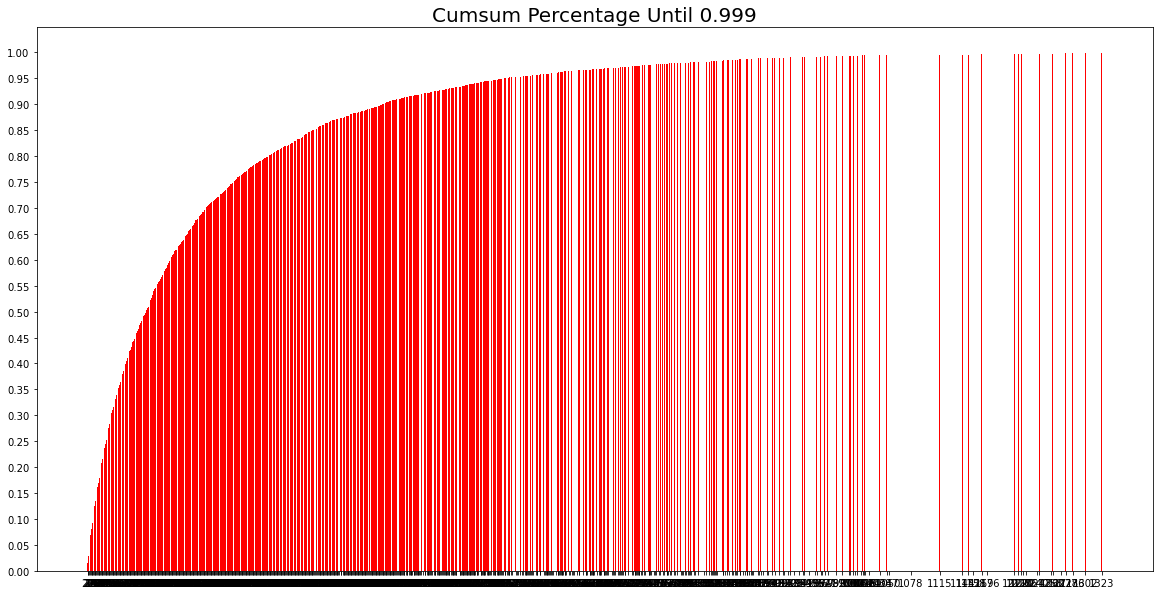

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_999.index,
        height=length_percent_cumsum_999, color='red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

### Session Time

In [105]:
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest)
print(latest)
print('\n')
oldest_time = transfer_time(oldest)
latest_time = transfer_time(latest)
print(oldest_time)
print(latest_time)

956703932
1046454590


2000-04-25 23:05:32
2003-02-28 17:49:50


\>> 약 3년 간의 데이터가 들어있다. 다면 여기서는 사용자별로 각기 다른 시간 데이터를 가지고 있다.

### ~Data Cleansing~
- 각 개인이 가지고 있는 데이터 개수 확인해보기  

**\>> 최소 20개 이상 가지고 있음. 적은 데이터 수를 가지고 있는 `UserId`없음**

In [106]:
# 데이터를 19개 이하로 가지고 있는 사용자 없음
user_size = data.groupby(['UserId']).size() <= 19
user_size[user_size == True]

Series([], dtype: bool)

In [107]:
# 데이터를 20개 이하로 가지고 있는 사용자 있음 (최소 20개는 가지고 있음)
user_size = data.groupby(['UserId']).size() <= 20
user_size[user_size == True]

UserId
98      True
160     True
217     True
250     True
311     True
        ... 
5533    True
5725    True
5828    True
5904    True
6038    True
Length: 86, dtype: bool

### 시간 변환 컬럼 추가

In [108]:
time_list = []
for i in range(data.shape[0]):
    time_list.append(transfer_time(int(data['Time'][i])))

data['Time_transfer'] = time_list
data.head(5)

,UserId,MovieId,Rating,Time,Time_transfer
31,1,3186,4,978300019,2000-12-31 22:12:40
22,1,1270,5,978300055,2000-12-31 22:35:09
27,1,1721,4,978300055,2000-12-31 22:32:48
37,1,1022,5,978300055,2000-12-31 22:04:35
24,1,2340,3,978300103,2001-01-06 23:38:11


In [109]:
data.reset_index(drop=True, inplace=True)
data.head(5)

,UserId,MovieId,Rating,Time,Time_transfer
0,1,3186,4,978300019,2000-12-31 22:12:40
1,1,1270,5,978300055,2000-12-31 22:35:09
2,1,1721,4,978300055,2000-12-31 22:32:48
3,1,1022,5,978300055,2000-12-31 22:04:35
4,1,2340,3,978300103,2001-01-06 23:38:11


***

# 3. 미니 배치의 구성

### Train/Valid/Test Split
- 총 시간 구간은 약 3년이므로 아래와 같이 기간을 설정한다.  
1) train: 최초 ~ 마지막 2달 전  
2) valid: 마지막 시기로부터 2달 전 (총 1달)  
3) test:  마지막 한 달

In [110]:
# Time_transfer 컬럼 기준으로 데이터를 나눈다.
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time_transfer'].max()
    session_last_time = data.groupby('UserId')['Time_transfer'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(days=n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index
    
    before_date = data[data['UserId'].isin(session_in_train)]
    after_date = data[data['UserId'].isin(session_in_test)]
    after_date = after_date[after_date['MovieId'].isin(before_date['MovieId'])]
    return before_date, after_date

In [158]:
tr, test = split_by_date(data, n_days=30)
tr, val = split_by_date(tr, n_days=30)

In [159]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["UserId"].nunique()}\n'
          f'\t Items: {data["MovieId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [160]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 919748
	 Sessions: 5858
	 Items: 3693
	 First Time : 956703932
	 Last Time : 1041215174

* valid Set Stats Info
	 Events: 29494
	 Sessions: 79
	 Items: 2977
	 First Time : 957547221
	 Last Time : 1043809240

* test Set Stats Info
	 Events: 50952
	 Sessions: 103
	 Items: 3198
	 First Time : 957179713
	 Last Time : 1046454590



In [161]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱합니다.
id2idx = {item_id : index for index, item_id in enumerate(tr['MovieId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['MovieId'].map(lambda x: id2idx.get(x, -1))  # id2idx에 없는 아이템은 모르는 값(-1) 처리 해줍니다.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

### ❗코드 파헤치기 - 딕셔너리.get(x,y)
- 딕셔너리.get(x,y): x라는 키(key)가 있으면 x에 해당하는 값(value)을 보여주고, 없다면 y를 보여줘라.  
예시: dict = {'a' : 1, 'b' : 2}  
dict.get('a') # 1  
dict.get('x','y') # 'y'

### Data Pipeline

In [162]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

### Session Dataset
- 데이터가 주어지면 세션이 시작되는 인덱스를 담는 값과 세션을 새로 인덱싱한 값을 갖는 클래스를 만듭니다.

In [163]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['UserId'].nunique())  # indexing to UserId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['UserId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('UserId').size().cumsum()
        return offsets

train데이터로 `SessionDataset` 객체를 만들고 인스턴스 변수들을 살펴보겠습니다.  
`click_offsets`: 각 세션이 시작된 인덱스  
`session_idx`: 각 세션을 인덱싱한 `np.array`  

In [164]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,UserId,MovieId,Rating,Time,Time_transfer,item_idx
0,1,3186,4,978300019,2000-12-31 22:12:40,0
1,1,1270,5,978300055,2000-12-31 22:35:09,1
2,1,1721,4,978300055,2000-12-31 22:32:48,2
3,1,1022,5,978300055,2000-12-31 22:04:35,3
4,1,2340,3,978300103,2001-01-06 23:38:11,4
5,1,1836,5,978300172,2000-12-31 22:37:48,5
6,1,3408,4,978300275,2000-12-31 22:33:59,6
7,1,2804,5,978300719,2000-12-31 22:11:59,7
8,1,1207,4,978300719,2000-12-31 22:37:48,8
9,1,1193,5,978300760,2000-12-31 22:22:48,9


In [165]:
tr_dataset.click_offsets

array([     0,     53,    182, ..., 919284, 919407, 919748], dtype=int32)

In [166]:
tr_dataset.session_idx

array([   0,    1,    2, ..., 5855, 5856, 5857])

### Session Data Loader
파이썬 문법 중 iterator, generator에 대한 좀더 친절한 안내가 필요하신 분은 이 [자료](https://dojang.io/mod/page/view.php?id=2405)를 먼저 보시길 권장합니다.  

`SessionDataset` 객체를 받아서 Session-Parallel mini-batch를 만드는 클래스를 만듭니다.
`__iter__` 메소드는 모델 인풋, 라벨, 세션이 끝나는 곳의 위치를 `yield`합니다.
mask는 후에 RNN Cell State를 초기화 하는데 사용할 것입니다.

In [167]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [168]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

,UserId,MovieId,Rating,Time,Time_transfer,item_idx
0,1,3186,4,978300019,2000-12-31 22:12:40,0
1,1,1270,5,978300055,2000-12-31 22:35:09,1
2,1,1721,4,978300055,2000-12-31 22:32:48,2
3,1,1022,5,978300055,2000-12-31 22:04:35,3
4,1,2340,3,978300103,2001-01-06 23:38:11,4
5,1,1836,5,978300172,2000-12-31 22:37:48,5
6,1,3408,4,978300275,2000-12-31 22:33:59,6
7,1,2804,5,978300719,2000-12-31 22:11:59,7
8,1,1207,4,978300719,2000-12-31 22:37:48,8
9,1,1193,5,978300760,2000-12-31 22:22:48,9


In [169]:
iter_ex = iter(tr_data_loader)

In [170]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [ 0 53 65 54]
Label Item Idx are :       [ 1 54 62 24]
Previous Masked Input Idx are []


***

# 4. 모델 구성

In [171]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [172]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [214]:
def create_model_2nd(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

모델에 사용할 hyper-parameter를 class형식으로 관리

In [218]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['MovieId'].nunique()
        self.num_sessions = tr['UserId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=64, hsz=50, drop_rate=0.3, lr=0.001, epochs=1, k=20)

In [219]:
model = create_model_2nd(args)

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(64, 1, 3693)]           0         
_________________________________________________________________
GRU (GRU)                    [(64, 50), (64, 50)]      561750    
_________________________________________________________________
dropout_14 (Dropout)         (64, 50)                  0         
_________________________________________________________________
dense_11 (Dense)             (64, 3693)                188343    
Total params: 750,093
Trainable params: 750,093
Non-trainable params: 0
_________________________________________________________________


***

### 모델 평가 지표

모델 성능 평가를 위한 지표를 보겠습니다.  
모델 성능에 대한 지표로 precision이나 recall이 있습니다.  
Session-Based Recommendation Task에서는 모델이 k개의 아이템을 제시했을 때, 유저가 클릭/ 구매한 n개의 아이템이 많아야 좋습니다.  
이 때문에 recall의 개념을 확장한 recall@k 지표, precision의 개념을 확장한 Mean Average Precision@k 지표 등을 사용합니다.  
추천에서는 몇 번째로 맞추느냐도 중요합니다. 구글에서 검색했을 때 1페이지에 원하는 결과가 나오지 않고 2페이지에 나온다면 유저 반응이 크게 떨어질 것입니다.  
따라서 순서에 민감한 지표인 MRR, NDCG 같은 지표도 사용합니다.  
이번 자료에서는 MRR과 Recall@k를 사용하겠습니다. MRR은 정답 아이템이 나온 순번의 역수 값입니다.  
따라서 정답 아이템이 추천 결과 앞쪽 순번에 나온다면 지표가 높아질 것이고 뒤쪽에 나오거나 안나온다면 지표가 낮아질 것입니다.  
NDCG, MRR, MAP에 대한 자세한 설명은 [링크](https://medium.com/swlh/rank-aware-recsys-evaluation-metrics-5191bba16832)를 확인해주세요.  
[MRR, MAP, NDCG 한글 설명 블로그](https://lamttic.github.io/2020/03/20/01.html)

In [220]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

# 5. 모델 학습

In [221]:
# train 셋으로 학습하면서 valid 셋으로 검증합니다.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['UserId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # 종료된 session은 hidden_state를 초기화합니다. 아래 메서드에서 확인해주세요.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증합니다.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # model에서 gru layer를 가져옵니다.
    hidden_states = gru_layer.states[0].numpy()  # gru_layer의 parameter를 가져옵니다.
    for elt in mask:  # mask된 인덱스 즉, 종료된 세션의 인덱스를 돌면서
        hidden_states[elt, :] = 0  # parameter를 초기화 합니다.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # valid셋과 test셋을 평가하는 코드입니다. 
                                             # train과 거의 같지만 mrr, recall을 구하는 라인이 있습니다.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['UserId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax 값이 큰 순서대로 sorting 합니다.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [222]:
# 학습 시간이 다소 오래 소요됩니다. (예상시간 1시간)
train_model(model, args)

Evaluation:  29%|██▊       | 131/459 [00:32<01:20,  4.08it/s]

	 - Recall@20 epoch 1: 0.245468
	 - MRR@20    epoch 1: 0.063802



***

# 6. 모델 테스트

In [223]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  53%|█████▎    | 418/794 [01:42<01:32,  4.08it/s]

	 - Recall@20: 0.220918
	 - MRR@20: 0.055921



***

# 7. 하이퍼 파라미터 변경에 따른 지표 변화

### 총 4가지 지표 변화에 대한 결과

1. batch_size=64, hsz=50, drop_rate=0.1, lr=0.001, epochs=1, k=20  
- Recall@20: 0.226600  
- MRR@20: 0.058414  

2. batch_size=64, hsz=50, drop_rate=0.3, lr=0.001, epochs=1, k=20  
- Recall@20: 0.222301  
- MRR@20: 0.057714  

3. batch_size=64, hsz=50, drop_rate=0.3, lr=0.001, epochs=10, k=20  
- Recall@20: 0.298146  
- MRR@20: 0.088679  

4. batch_size=64, hsz=50, drop_rate=0.3, lr=0.001, epochs=1, k=20 & 2nd model  
- Recall@20: 0.220918  
- MRR@20: 0.055921


### 지표 변화에 대한 검토
1. drop_rate: 0.1 -> 0.3  
**\>> MRR@20기준: 0.058414 -> 0.057714, 유의미한 결과 없음**  

2. epochs: 1 -> 10  
**\>> MRR@20기준: 0.057714 -> 0.088679, 역시 에폭이 늘어남에 따라 개선 증가 효과 확인**  

3. model변화: GRU, dropout추가  
**\>> MRR@20기준: 0.088679 -> 0.055921, 모델 변경은 오히려 떨어졌다.**

# 8. 회고

## 8-1. 루브릭
### 1. Movielens 데이터셋을 session based recommendation 관점으로 전처리하는 과정이 체계적으로 진행되었다.
(데이터셋의 면밀한 분석을 토대로 세션단위 정의 과정(길이분석, 시간분석)을 합리적으로 수행한 과정이 기술되었다.)  

### 2. RNN 기반의 예측 모델이 정상적으로 구성되어 안정적으로 훈련이 진행되었다.
(적절한 epoch만큼의 학습이 진행되는 과정에서 train loss가 안정적으로 감소하고, validation 단계에서의 Recall, MRR이 개선되는 것이 확인된다.)  

### 3. 세션정의, 모델구조, 하이퍼파라미터 등을 변경해서 실험하여 Recall, MRR 등의 변화추이를 관찰하였다.
(3가지 이상의 변화를 시도하고 그 실험결과를 체계적으로 분석하였다.)  


## 8-2. 회고
1. 이전에 했던 추천 시스템과 연관되어 진행한 노드였는데, `세션`이라는 새로운 개념에 대해 이해하게 되었다.  
2. 노드에서는 데이터 셋이 2개였는데 본 프로젝트 진행 시에는 하나의 파일로 진행했다.  
3. 데이터 전처리 부분에서 고민이 많았는데, **동일한 사람이 동일한 시간(초)에 5개의 영화를 봤다?라는 이상한 데이터가 있어서 중복검사를 해보니 이러한 데이터가 전체 데이터의 77%이상이었다...!**  
4. 결국 중복 데이터를 삭제하지 않았고, **길이가 작은 데이터도 지우려고 했으나 최소 개수가 20개라는 점에서 삭제하지 않고 진행했다**  
5. 그래서 datetime 모듈을 이용해 실제 날짜와 시간을 구해보니 2000년대임을 알게 되었고 넷플릭스 등 온라인 플랫폼에서 동일한 아이디로 여러 명이 동시에 영화를 시청했다는 결론을 내렸다. 여기서 **datetime에 대한 적용을 할 수 있었다.**  
6. 전처리가 끝난 후 학습을 진행할 때 index error이 발생했는데, `@Hibiscircus`님의 도움으로 배치 사이즈와 연관되어 있음을 깨달았다.  
7. 해결 방법: 배치사이즈가 데이터 개수보다 더 크기 때문에 0,1,2,....,76,77(없네?)-->error 이렇게 되었던 것이다. 그래서 index error가 발생한 숫자보다 배치 사이즈를 더 작게 만들어 학습을 진행하니 원활히 되었다.  
8. 또한 이번 노드에서는 이전에 E2에서 배웠던 `precision`, `recall`의 개념을 다시 한번 깨우치게 되었고 `@k`라는 개념도 심도있게 배울 수 있었다. 물론 `MRR`, `MAP`, `NDCG`등의 개념도 잘 정리하는 기회로 삼았다.  
9. 다운 받은 데이터 셋을 보니 영화 이름, 장르, 우편번호 등 다양한 컬럼이 있었는데 결합하지 못한 점이 아쉽긴 하다. 별도의 프로젝트가 있다면 도전해봐도 좋을 것 같다.  